# DATA 311 - Lecture 3

## Announcements

* There is a CS Department Social event - open to CS majors and folks in 241, 247, and 301, and 311 (that's you!)
    * Today 4-5:30, KB 122 Pizza. Drinks. Raffle (at 4:15)
    * Details: <https://cs.wwu.edu/welcome-fall-quarter-student-social>
* Lab - how'd it go / how's it going?
* Today's lecture: you may want to follow along in our own copy of the notebook. You can grab the ipynb I'm working with from the course webpage.

## Goals
* Know how to use integer and boolean indexing in numpy.
* Understand the fundamental data structures and concepts of the `pandas` library, and how they relate to each other:
  * Series, DataFrame, index

* Know enough about pandas to be able to do, or look up how to do, the following basic data manipulation tasks:
  * Show the first or last k rows
  * Drop columns from a DataFrame
  * Get the dimensions of the table
  * Extract a single column
  * Extract multiple columns
  * Extract a single column as a DataFrame
  * Sort the table on a column
  * Get a custom slice of rows
  * Count number of rows with each value in a categorical column
  * Plot a column as a line graph
  * Scatterplot 2 columns
  * Group by a categorical variable and apply reductions to each group
  * Get only rows that meet some condition
  * Show summary statistics of a DataFrame

We may not get to all of these today, but by the time you complete Lab 2, you should be able to accomplish the above.

### Jupyter - Markdown Cells
* Allow you to intersperse formatted text with code.
* Type your markdown syntax, "run" the cell to see the formatted Markdown
* Basic markdown formatting
    * headings
    * lists (bulleted, numbered)
    * italics, bold, monospace
    * code block
    * link
    * image `https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_25f/lab4/diagonal_example.png`



#### Markdown demo:

* **bulleted** lists
* other lists

1. *numbered* lists
1. `other lists`


1. another
1. list

```python
a = 4
b = 7
```
[link text](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_25f/)

![alt text](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_25f/lab1/diagonal_example.png)


### Advantage of Jupyter:

* **Reproducibility**. Cardinal rule of data science: **Always start with the raw data.**


## Numpy, Continued


In [157]:
import numpy as np

### Questions on Lecture 2, Pre-Lab and/or Lab 1?

In [158]:
a = np.array(range(10, 20))


In [161]:
a[0:4:2]

array([10, 12])

### Fancy indexing
* Integer indexing: `a[ list or ndarray of integer indices ]`
* Boolean indexing: `a[ list or ndarray of booleans ]` where the list/ndarray's shape matches a's


See <https://numpy.org/doc/stable/user/basics.indexing.html> for much more.

#### Integer indexing

In [162]:
a = np.array(range(10, 20))
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Indexing with a list or array of integers pulls out only the elements at those indices:

In [163]:
# get the first, third, and fifth elements:
a[[0, 2, 4]]

array([10, 12, 14])

In [165]:
# get the fourth, second, and second elements (!):
a[[3, 1, 1]]

array([13, 11, 11])

#### Boolean Indexing


In [166]:
b = np.ones((2, 2))
b[0,0] = 2
b[1,1] = 0

**Quick quiz: what does b look like now?**

In [167]:
b

array([[2., 1.],
       [1., 0.]])

Make a "mask" of booleans that's the same shape as `b`:

In [170]:
mask = np.array([
    [True, False],
    [False, True]
])
mask

array([[ True, False],
       [False,  True]])

Index b with a boolean mask:

In [171]:
b[mask]

array([2., 0.])

A common pattern - boolean operators to generate a mask:

In [174]:
# pull out all elements of b that are greater than zero:
b[b > 0]

array([2., 1., 1.])

#### Tips for multidimensional arrays

* I never display anything that's more than 2D.
* I never try to visualize anything that's more than 3D.

In [176]:
c = np.array(range(24)).reshape(2, 4, 3)
c

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [177]:
# take one 2D slice
c[:,:,0]

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21]])

In [178]:
# take another 2D slice along a different axis
c[:, 1, :]

array([[ 3,  4,  5],
       [15, 16, 17]])

## Pandas Basics - How to Learn Pandas (and other tools we'll use in this class):

<img src="https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L02/changing.jpg" style="height: 300px"/>
<img src="https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L02/googling.jpg" style="height: 300px"/>
<img src="https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L02/copying.jpg" style="height: 300px"/>

#### But seriously

I won't teach you every little thing you need to use. I will expect you to be able to find and use functionality that gets the job done. The Lab 2 handout has some suggestions for how to go about searching and learning process. I also won't quiz/test you on syntactic minutia, though the basics are fair game.

## Pandas: a library for working with tabular data

#### What do we mean by tabular data?

(whiteboard)

## Pandas: basic data structures/concepts

* Series
* Index
* DataFrame

In [179]:
from pandas import Series, DataFrame
import pandas as pd

### Series - a 1D list-like thing (think of it as a column with labels)

In [180]:
s = Series([9,6,8,4])
s


0    9
1    6
2    8
3    4
dtype: int64

The values are the items in the Series themselves:

In [181]:
# get the values:
s.values

array([9, 6, 8, 4])

The indices are the "labels" - the left column in the display above. We didn't provide labels, so they defaulted to sequential integers:

In [182]:
# get the index:
s.index

RangeIndex(start=0, stop=4, step=1)

Square bracket indexing pulls out the value at an index:

In [183]:
# get the third value:
s[2]

np.int64(8)

We can customize the index:

In [184]:
s2 = Series([9,6,8,4],index=['win','spr','sum','fal'])
s2

win    9
spr    6
sum    8
fal    4
dtype: int64

In [185]:
# get the values:
s2.values

array([9, 6, 8, 4])

In [186]:
# get the indices:
s2.index

Index(['win', 'spr', 'sum', 'fal'], dtype='object')

In [187]:
# get the value at index "win":
s2["win"]

np.int64(9)

What if I want the second thing? Don't do this:

In [188]:
s2[1]

/tmp/ipykernel_455/2825080482.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s2[1]


np.int64(6)

instead do this:


In [189]:
# get the second thing:
s2.iloc[1]

np.int64(6)

`iloc` allows you to use numerical (numpy-like) indexing into a Series or dataframe even when its index has different labels.

Notice that `iloc` is, weirdly not a function - it's `.iloc[ind]`, not `.iloc(ind)`.

Slicing works too:

In [190]:
# get the second and third things:
s2.iloc[1:3]

spr    6
sum    8
dtype: int64

We can create a Series from a dictionary:

In [191]:
d = {}
d['win'] = 9
d['spr'] = 6
d['sum'] = 8
d['fal'] = 4
s3 = Series(d)
s3

win    9
spr    6
sum    8
fal    4
dtype: int64

Many things that work on dictionaries and lists work on Series:

In [192]:
# is 'fal' a key in s3?
'fal' in s3

True

In [193]:
# is 'jan' a key in s3?
'jan' in s3

False

In [195]:
6 in s3.values

True

### DataFrames
DataFrames represent 2D tables.

Create a DataFrame from scratch:

In [198]:
data = {'city': ['Seattle','Spokane','Tacoma','Vancouver'],
        'pop': [787,230,222,189], # units are thousands
        'tax': [10.25,9.0,10.3,8.5]}
df = DataFrame(data)
df

city  pop    tax
0    Seattle  787  10.25
1    Spokane  230   9.00
2     Tacoma  222  10.30
3  Vancouver  189   8.50

Each column is a Series. Indexing the DataFrame by the column name extracts the Series:

In [201]:
# get the city column using square brackets:
df["city"]

0      Seattle
1      Spokane
2       Tacoma
3    Vancouver
Name: city, dtype: object

Another way to access a column; generally prefer the square brackets, since column names can have spaces and other weirdness.

In [202]:
# get the city column as a property:
df.city

0      Seattle
1      Spokane
2       Tacoma
3    Vancouver
Name: city, dtype: object

Elementwise arithmetic works on Series (they are based on numpy arrays):

In [206]:
# divide the tax column by 100:
df['tax'] / 100

0    0.1025
1    0.0900
2    0.1030
3    0.0850
Name: tax, dtype: float64

Add a column to an existing DataFrame:

In [207]:
df['visits'] = [20,2,5,4]
df

city  pop    tax  visits
0    Seattle  787  10.25      20
1    Spokane  230   9.00       2
2     Tacoma  222  10.30       5
3  Vancouver  189   8.50       4

### More pandas, now with Avengers

For demo purposes, we'll use a dataset downloaded from [FiveThirtyEight](https://data.fivethirtyeight.com/), which compiled it for a 2015 article entitled [Joining The Avengers Is As Deadly As Jumping Off A Four-Story Building](https://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/). It catalogs information about all of the characters from the Marvel comic books that were ever members of the Avengers. You can find some meta-information about the dataset including a description of what each column means in the accompanying [readme file](https://fw.cs.wwu.edu/~wehrwes/courses/data311_23w/data/avengers/README.md) (it's in Markdown format; one easy way to display it nicely would be to paste its contents into a Markdown cell in a notebook).

In [208]:
data_url = 'https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/avengers/avengers.csv'

In [209]:
avengers = pd.read_csv(data_url, encoding='latin-1')
avengers

URL  \
0        http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1    http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2    http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3    http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4     http://marvel.wikia.com/Thor_Odinson_(Earth-616)   
..                                                 ...   
168   http://marvel.wikia.com/Eric_Brooks_(Earth-616)#   
169  http://marvel.wikia.com/Adam_Brashear_(Earth-6...   
170  http://marvel.wikia.com/Victor_Alvarez_(Earth-...   
171     http://marvel.wikia.com/Ava_Ayala_(Earth-616)#   
172         http://marvel.wikia.com/Kaluu_(Earth-616)#   

                      Name/Alias  Appearances Current?  Gender  \
0      Henry Jonathan "Hank" Pym         1269      YES    MALE   
1                 Janet van Dyne         1165      YES  FEMALE   
2    Anthony Edward "Tony" Stark         3068      YES    MALE   
3            Robert Bruce Banner         2089      YES    MALE   
4                   Thor Odinson         2402      YES    MALE   
..                           ...          ...      ...     ...   
168                  Eric Brooks          198      YES    MALE   
169                Adam Brashear           29      YES    MALE   
170               Victor Alvarez           45      YES    MALE   
171                    Ava Ayala           49      YES  FEMALE   
172                        Kaluu           35      YES    MALE   

    Probationary Introl Full/Reserve Avengers Intro  Year  \
0                   NaN                      Sep-63  1963   
1                   NaN                      Sep-63  1963   
2                   NaN                      Sep-63  1963   
3                   NaN                      Sep-63  1963   
4                   NaN                      Sep-63  1963   
..                  ...                         ...   ...   
168                 NaN                      13-Nov  2013   
169                 NaN                      14-Jan  2014   
170                 NaN                      14-Jan  2014   
171                 NaN                      14-Jan  2014   
172                 NaN                      15-Jan  2015   

     Years since joining Honorary  ... Return1 Death2 Return2 Death3 Return3  \
0                     52     Full  ...      NO    NaN     NaN    NaN     NaN   
1                     52     Full  ...     YES    NaN     NaN    NaN     NaN   
2                     52     Full  ...     YES    NaN     NaN    NaN     NaN   
3                     52     Full  ...     YES    NaN     NaN    NaN     NaN   
4                     52     Full  ...     YES    YES      NO    NaN     NaN   
..                   ...      ...  ...     ...    ...     ...    ...     ...   
168                    2     Full  ...     NaN    NaN     NaN    NaN     NaN   
169                    1     Full  ...     NaN    NaN     NaN    NaN     NaN   
170                    1     Full  ...     NaN    NaN     NaN    NaN     NaN   
171                    1     Full  ...     NaN    NaN     NaN    NaN     NaN   
172                    0     Full  ...     NaN    NaN     NaN    NaN     NaN   

    Death4 Return4 Death5 Return5  \
0      NaN     NaN    NaN     NaN   
1      NaN     NaN    NaN     NaN   
2      NaN     NaN    NaN     NaN   
3      NaN     NaN    NaN     NaN   
4      NaN     NaN    NaN     NaN   
..     ...     ...    ...     ...   
168    NaN     NaN    NaN     NaN   
169    NaN     NaN    NaN     NaN   
170    NaN     NaN    NaN     NaN   
171    NaN     NaN    NaN     NaN   
172    NaN     NaN    NaN     NaN   

                                                 Notes  
0    Merged with Ultron in Rage of Ultron Vol. 1. A...  
1    Dies in Secret Invasion V1:I8. Actually was se...  
2    Death: "Later while under the influence of Imm...  
3    Dies in Ghosts of the Future arc. However "he ...  
4    Dies in Fear Itself brought back because that'...  
..                                                 ...  
168                    

Display only the first 2 rows of the table:

In [210]:
# use head:
avengers.head(2)

URL  \
0      http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1  http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   

                  Name/Alias  Appearances Current?  Gender  \
0  Henry Jonathan "Hank" Pym         1269      YES    MALE   
1             Janet van Dyne         1165      YES  FEMALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   

  Honorary  ... Return1 Death2 Return2 Death3 Return3 Death4 Return4 Death5  \
0     Full  ...      NO    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
1     Full  ...     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   

  Return5                                              Notes  
0     NaN  Merged with Ultron in Rage of Ultron Vol. 1. A...  
1     NaN  Dies in Secret Invasion V1:I8. Actually was se...  

[2 rows x 21 columns]

Only the last 3:

In [211]:
# use tail:
avengers.tail(3)

URL      Name/Alias  \
170  http://marvel.wikia.com/Victor_Alvarez_(Earth-...  Victor Alvarez   
171     http://marvel.wikia.com/Ava_Ayala_(Earth-616)#       Ava Ayala   
172         http://marvel.wikia.com/Kaluu_(Earth-616)#           Kaluu   

     Appearances Current?  Gender Probationary Introl  \
170           45      YES    MALE                 NaN   
171           49      YES  FEMALE                 NaN   
172           35      YES    MALE                 NaN   

    Full/Reserve Avengers Intro  Year  Years since joining Honorary  ...  \
170                      14-Jan  2014                    1     Full  ...   
171                      14-Jan  2014                    1     Full  ...   
172                      15-Jan  2015                    0     Full  ...   

    Return1 Death2 Return2 Death3 Return3 Death4 Return4 Death5 Return5 Notes  
170     NaN    NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN   NaN  
171     NaN    NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN   NaN  
172     NaN    NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN   NaN  

[3 rows x 21 columns]

What are all the columns?

In [213]:
# list the columns
avengers.columns

Index(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'],
      dtype='object')

New view of the table, with the URL column dropped:

In [214]:
# use drop:

avengers.drop(columns=["URL"]).head()


Name/Alias  Appearances Current?  Gender  \
0    Henry Jonathan "Hank" Pym         1269      YES    MALE   
1               Janet van Dyne         1165      YES  FEMALE   
2  Anthony Edward "Tony" Stark         3068      YES    MALE   
3          Robert Bruce Banner         2089      YES    MALE   
4                 Thor Odinson         2402      YES    MALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   
2                 NaN                      Sep-63  1963                   52   
3                 NaN                      Sep-63  1963                   52   
4                 NaN                      Sep-63  1963                   52   

  Honorary Death1 Return1 Death2 Return2 Death3 Return3 Death4 Return4 Death5  \
0     Full    YES      NO    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
1     Full    YES     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
2     Full    YES     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
3     Full    YES     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
4     Full    YES     YES    YES      NO    NaN     NaN    NaN     NaN    NaN   

  Return5                                              Notes  
0     NaN  Merged with Ultron in Rage of Ultron Vol. 1. A...  
1     NaN  Dies in Secret Invasion V1:I8. Actually was se...  
2     NaN  Death: "Later while under the influence of Imm...  
3     NaN  Dies in Ghosts of the Future arc. However "he ...  
4     NaN  Dies in Fear Itself brought back because that'...

Look at the dimensions of the table:

In [215]:
# use shape
avengers.shape

(173, 21)

Extract the Series representing one column:

In [216]:
# extract the Name/Alias columnn:
avengers["Name/Alias"]

0        Henry Jonathan "Hank" Pym
1                   Janet van Dyne
2      Anthony Edward "Tony" Stark
3              Robert Bruce Banner
4                     Thor Odinson
                  ...             
168                    Eric Brooks
169                  Adam Brashear
170                 Victor Alvarez
171                      Ava Ayala
172                          Kaluu
Name: Name/Alias, Length: 173, dtype: object

Extract a view of the DataFrame containing only a subset of the columns:

In [224]:
na = avengers[["Name/Alias", "Appearances"]]
na

Name/Alias  Appearances
0      Henry Jonathan "Hank" Pym         1269
1                 Janet van Dyne         1165
2    Anthony Edward "Tony" Stark         3068
3            Robert Bruce Banner         2089
4                   Thor Odinson         2402
..                           ...          ...
168                  Eric Brooks          198
169                Adam Brashear           29
170               Victor Alvarez           45
171                    Ava Ayala           49
172                        Kaluu           35

[173 rows x 2 columns]

If the size of the subset is one, it gives you a one-column table:

In [223]:
# extract a DataFrame with just Name/Alias:
avengers[["Name/Alias"]]

Name/Alias
0      Henry Jonathan "Hank" Pym
1                 Janet van Dyne
2    Anthony Edward "Tony" Stark
3            Robert Bruce Banner
4                   Thor Odinson
..                           ...
168                  Eric Brooks
169                Adam Brashear
170               Victor Alvarez
171                    Ava Ayala
172                        Kaluu

[173 rows x 1 columns]

Notice that this is different from `avengers["Name/Alias"]` above because this is a DataFrame, whereas the above gives you a Series.

Sort the Avengers by number of appearances:

In [225]:
na = na.sort_values("Appearances", ascending=False)
na

Name/Alias  Appearances
73         Peter Benjamin Parker         4333
6                  Steven Rogers         3458
92         James "Logan" Howlett         3130
2    Anthony Edward "Tony" Stark         3068
4                   Thor Odinson         2402
..                           ...          ...
117                 Dennis Sykes            6
65                  Gene Lorrene            4
68                  Doug Taggert            3
39                 Moira Brandon            2
125                        Fiona            2

[173 rows x 2 columns]

**Quick quiz: How could we show the 10th through 20th most-appearing avengers?**

In [228]:
na.iloc[9:19]

Name/Alias  Appearances
58       Susan Richards (nee Storm)         1761
140                    Ororo Munroe         1598
49                   Namor McKenzie         1561
7            Clinton Francis Barton         1456
141                    Matt Murdock         1375
104  Doctor Stephen Vincent Strange         1324
0         Henry Jonathan "Hank" Pym         1269
9                    Wanda Maximoff         1214
1                    Janet van Dyne         1165
15       Natalia Alianovna Romanova         1112

Note on `iloc` - it can also index across columns:


In [230]:
# Extract the first four avengers, and the second through fourth columns:
avengers.iloc[:4, 1:4]

Name/Alias  Appearances Current?
0    Henry Jonathan "Hank" Pym         1269      YES
1               Janet van Dyne         1165      YES
2  Anthony Edward "Tony" Stark         3068      YES
3          Robert Bruce Banner         2089      YES

Basic plotting is built into pandas!

<Axes: >

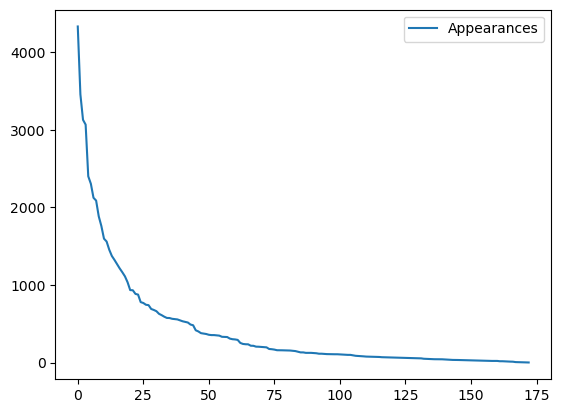

In [231]:
na.plot(y="Appearances", use_index=False)

For a categorical column like Gender, we can count the frequency of each value:

In [ ]:
avengers["Gender"]

In [ ]:
# value_counts

In [ ]:
avengers.plot.scatter("Years since joining", "Appearances")

#### Getting fancier

In [ ]:
avengers.groupby("Gender")["Appearances"].mean()

In [ ]:
avengers[avengers["Gender"] =="FEMALE"].head(3)

In [ ]:
avengers[avengers["Appearances"] > 2000]

In [ ]:
# column info
avengers.info()

In [ ]:
avengers.describe()

### Jupyter: a whirlwind tour

Things to demo:

- [x] Show the first 5 rows, last 10 rows
- [x] Drop some columns
- [x] Get the dimensions of the table
- [x] Get a single column
- [x] Get multiple columns
- [x] Get a single column as a DataFrame
- [x] Sort the table
- [x] Get a custom slice of rows (not-quite-superstars)
- [x] Count number of rows with each value in a categorical column (e.g., gender)

End of L02; done at the beginning of L03:
- [x] Plot a column
- [x] Scatterplot 2 columns
- [x] Compute by groups
- [x] Get only rows that meet some condition
- [x] Show summary statistics of a DataFrame